<a href="https://colab.research.google.com/github/hekoh99/ai-security/blob/master/5th%20week/haeun_ai_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

haeunKo ai security 과제 연습

In [0]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

load_iris가 반환한 iris객체는 파이썬의 딕셔너리와 비슷한 bunch 클래스의 객체다
(키와 값으로 구성되어있음)

In [4]:
print("iris_dataset의 키 : \n{}".format(iris_dataset.keys()))

iris_dataset의 키 : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


DESCR키에는 데이터 셋에 대한 간략한 설명이 있다. 

In [5]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [6]:
print("타겟의 이름 : {}".format(iris_dataset['target_names']))

타겟의 이름 : ['setosa' 'versicolor' 'virginica']


target_name의 값은 예측하고자 하는 붓꽃의 품종 이름을 문자 배열로 가지고 있다

In [9]:
print("특성의 이름 : \n{}".format(iris_dataset['feature_names']))

특성의 이름 : 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


실행 결과 feature_names값은 각 특성을 설명하는 문자열 리스트임을 알 수 있다

In [10]:
print("data의 타입 : {}".format(type(iris_dataset['data'])))

data의 타입 : <class 'numpy.ndarray'>


data의 타입을 알아보기 위한 코드다
꽃잎의 길이와 폭, 꽃받침의 길이와 폭을 수치값으로 갖고 있는 Numpy배열이다
그 배열의 행은 개개의 꽃이 되겠고 열은 각 꽃에서 구한 네 개의 측정치다

In [11]:
print("data의 크기 : {}".format(iris_dataset['data'].shape))

data의 크기 : (150, 4)


실행 결과를 보면 이 배열은 150개의 붓꽃 데이터를 가지고 있다는 것을 알 수 있다

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [16]:
print("x_train 크기 : {}".format(x_train.shape))
print("y_train 크기 : {}".format(y_train.shape))

x_train 크기 : (112, 4)
y_train 크기 : (112,)


In [17]:
print("x_test 크기 : {}".format(x_test.shape))
print("y_test 크기 : {}".format(y_test.shape))

x_test 크기 : (38, 4)
y_test 크기 : (38,)


밑의 코드는 어떻게 해야 에러가 안나는 지 잘 모르겠다

구글링 해서 필요하다고 하는 모듈들을 다 import해보고 이름을 바꿔보고 해봤지만 해결하지 못함

AttributeError: ignored

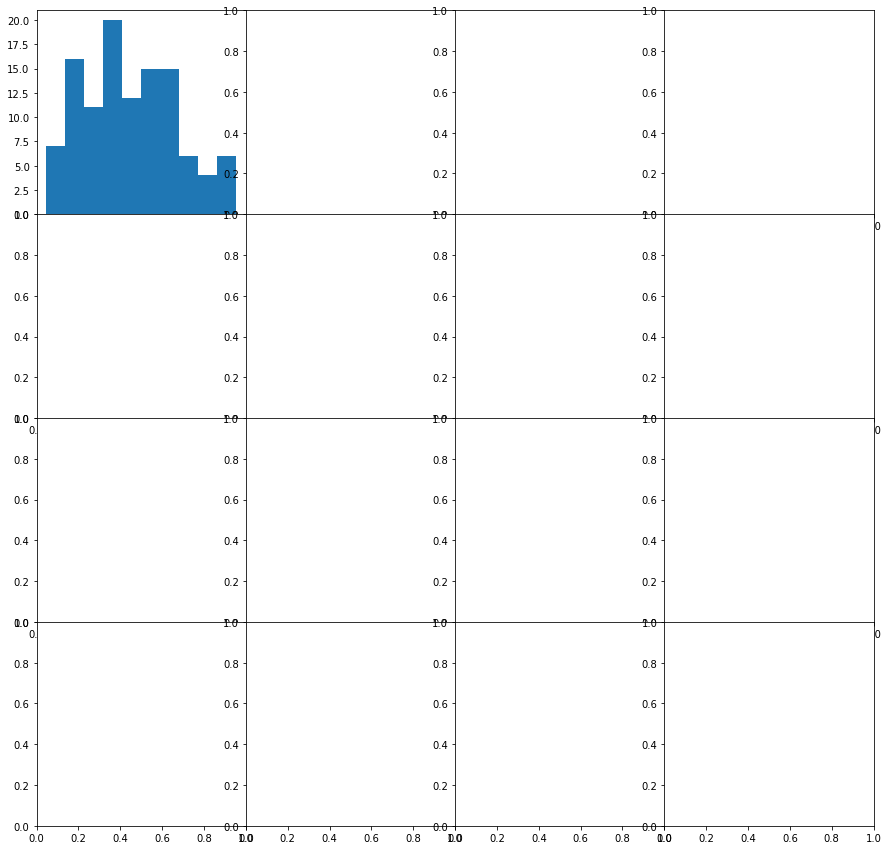

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris_dataframe = pd.DataFrame(x_train, columns = iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize = (15,15), marker = 'o', hist_kwds={'bin':20}, s=60, alpha=.8, cmap = mglearn.cm3)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

knn 객체는 훈련 데이터로 모델을 만들고 새로운 데이터 포인트에 대해 예측하는 알고리즘을 캡슐화한 것. 또한 알고리즘이 훈련 데이터로부터 추출한 정보를 담고 있음. KNeighborsClassifier의 경우는 훈련 데이터 자체를 저장하고 있다

In [35]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [36]:
x_new = np.array([[5,2.9,1,0.2]])
print("x_new.shape : {}".format(x_new.shape))

x_new.shape : (1, 4)


붓꽃 하나의 측정 값은 2차원 numpy배열에 행으로 들어간다

In [38]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
iris_dataset['target_names'][prediction]))

예측: [0]
예측한 타깃의 이름: ['setosa']


만든 모델이 새로운 붓꽃을 setosa 품종을 의미하는 클래스 0으로 예측했다

In [40]:
y_pred = knn.predict(x_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [41]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


정확도를 계산하여 모델의 성능을 평가한 것.

reference tensor flow blog 1.7chapter